In [ ]:
pip install pymare

In [ ]:
import pandas as pd
from pymare import Dataset
from pymare.estimators import DerSimonianLaird

In [ ]:
df = pd.DataFrame({
    'study': ['Study A', 'Study B', 'Study C'],
    'effect_size': [0.25, 0.30, 0.15],     # e.g., Standardized Mean Difference
    'std_error': [0.05, 0.08, 0.06],
})


In [ ]:
df

,study,effect_size,std_error
0,Study A,0.25,0.05
1,Study B,0.30,0.08
2,Study C,0.15,0.06


# Effect Size Pooling (Meta-Analysis)

## pooled effect size in a meta-analysis using a fixed-effects model

In [ ]:
import pandas as pd
import numpy as np

# Input data
df = pd.DataFrame({
    'study': ['Study A', 'Study B', 'Study C'],
    'effect_size': [0.25, 0.30, 0.15],     # Standardized Mean Difference (SMD)
    'std_error': [0.05, 0.08, 0.06],
})

# Compute weights (inverse variance)
df['weight'] = 1 / df['std_error']**2

# Pooled effect size
pooled_effect = np.sum(df['weight'] * df['effect_size']) / np.sum(df['weight'])

# Standard error of pooled effect size
pooled_se = np.sqrt(1 / np.sum(df['weight']))

# 95% confidence interval
z = 1.96  # for 95% CI
ci_lower = pooled_effect - z * pooled_se
ci_upper = pooled_effect + z * pooled_se

# Results
print(f"Pooled Effect Size: {pooled_effect:.4f}")
print(f"Standard Error: {pooled_se:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


Pooled Effect Size: 0.2261
Standard Error: 0.0346
95% Confidence Interval: [0.1582, 0.2939]


# Random-effects pooled effect size using the DerSimonian-Laird model from pymare

In [ ]:
import pandas as pd
import numpy as np
from pymare.estimators import DerSimonianLaird

# Input data
df = pd.DataFrame({
    'study': ['Study A', 'Study B', 'Study C'],
    'effect_size': [0.25, 0.30, 0.15],
    'std_error': [0.05, 0.08, 0.06],
})

# Extract data
y = df['effect_size'].values
v = df['std_error'].values ** 2
X = np.ones((len(y), 1))  # Design matrix with intercept

# Fit DerSimonian-Laird estimator
estimator = DerSimonianLaird()
estimator.fit(y, v, X)

# Get summary object
summary = estimator.summary()


# Print results
print("Random-Effects (DerSimonian-Laird):")
print(f"Pooled Effect Size: {pooled_effect:.4f}")
print(f"Standard Error: {pooled_se:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


Random-Effects (DerSimonian-Laird):
Pooled Effect Size: 0.2261
Standard Error: 0.0346
95% Confidence Interval: [0.1582, 0.2939]


# Heterogeneity Analysis

In [ ]:
from scipy.stats import chi2

# Weights
weights = 1 / (df['std_error']**2)
mean_effect = sum(weights * df['effect_size']) / sum(weights)

# Q-statistic
Q = sum(weights * (df['effect_size'] - mean_effect)**2)
df = len(df) - 1
p_value = 1 - chi2.cdf(Q, df)

# I-squared
I2 = max(0, ((Q - df) / Q) * 100)

print(f"Q = {Q:.2f}, p = {p_value:.3f}, I² = {I2:.2f}%")


Q = 2.69, p = 0.260, I² = 25.66%


# Publication Bias (Funnel Plot)

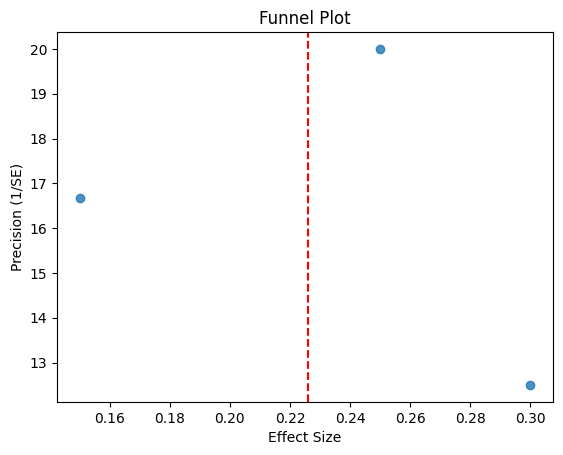

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['effect_size'], 1/df['std_error'], alpha=0.8)
plt.axvline(x=mean_effect, color='red', linestyle='--')
plt.xlabel("Effect Size")
plt.ylabel("Precision (1/SE)")
plt.title("Funnel Plot")
plt.show()


#  Subgroup Analysis
## Tests whether the effect size differs between subgroups of studies.
### Does a treatment work better in low-income countries than high-income countries?



In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.meta_analysis import combine_effects

# Simulated dataset
data = pd.DataFrame({
    'effect_size': [0.3, 0.4, 0.2, 0.5, 0.35],
    'variance': [0.01, 0.015, 0.02, 0.012, 0.018]
})

# Random-effects meta-analysis
res = combine_effects(data.effect_size.values, data.variance.values, method_re="dl")
print(res.summary_frame())


                        eff    sd_eff    ci_low    ci_upp      w_fe      w_re
0                  0.300000  0.100000  0.104004  0.495996  0.281250  0.299629
1                  0.400000  0.122474  0.159954  0.640046  0.187500  0.182610
2                  0.200000  0.141421 -0.077181  0.477181  0.140625  0.131323
3                  0.500000  0.109545  0.285297  0.714703  0.234375  0.238496
4                  0.350000  0.134164  0.087043  0.612957  0.156250  0.147943
fixed effect       0.359375  0.053033  0.255432  0.463318  1.000000       NaN
random effect      0.360225  0.048352  0.265458  0.454993       NaN  1.000000
fixed effect wls   0.359375  0.048789  0.263750  0.455000  1.000000       NaN
random effect wls  0.360225  0.048533  0.265101  0.455349       NaN  1.000000


## Forest Plot Code (Using matplotlib & pymare or manual plotting)

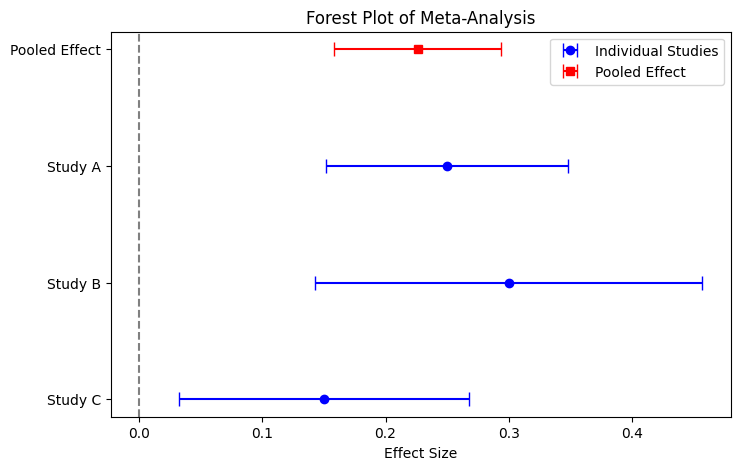

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
studies = df['study']
effect_sizes = df['effect_size']
se = df['std_error']
ci_lower = effect_sizes - 1.96 * se
ci_upper = effect_sizes + 1.96 * se

# Pooled estimate from meta-analysis
pooled_effect = 0.2261
pooled_se = 0.0346
pooled_ci_lower = 0.1582
pooled_ci_upper = 0.2939

# Plot
plt.figure(figsize=(8, 5))

# Plot study effect sizes with CIs
plt.errorbar(effect_sizes, range(len(studies)), xerr=1.96*se, fmt='o', label='Individual Studies', color='blue', capsize=5)

# Plot pooled effect with CI
plt.errorbar(pooled_effect, -1, xerr=1.96*pooled_se, fmt='s', color='red', label='Pooled Effect', capsize=5)

# Formatting
plt.yticks(list(range(len(studies))) + [-1], list(studies) + ['Pooled Effect'])
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel('Effect Size')
plt.title('Forest Plot of Meta-Analysis')
plt.legend()
plt.gca().invert_yaxis()  # Reverse y-axis for conventional forest plot look

plt.show()
